## Covid 19 Case Data - United States (CA & IN focus)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime as dt
import time

pd.options.display.max_rows = 40
pd.options.display.max_rows

40

In [2]:
#Import files to use with API's
county_path = 'Resources/us_counties_states_filtered.csv'
date_path = 'Resources/dates.csv'

In [3]:
us_counties_df = pd.read_csv(county_path)
date_df = pd.read_csv(date_path)

In [4]:
# mask1 = date_df['Date']<'2020-10-15'
# date_df=date_df[mask1]
# date_df.sort_values(by = 'Date', ascending=True, inplace = True)
# date_df

### API Calls to Pull Coronavirus Data by County

In [5]:
county_list = []
state_list = []
# map1 = us_counties_df['State']=='Nevada'
county_list = us_counties_df['County, State'].tolist()
date_list = date_df['Date'].tolist()
date_list = ['2021-07-31',
'2021-08-01',
'2021-08-02',
'2021-08-03',
'2021-08-04',
'2021-08-05',
'2021-08-06',
'2021-08-07',
'2021-08-08',
'2021-08-09',
'2021-08-10',
'2021-08-11',
'2021-08-12',
'2021-08-13',
'2021-08-14',
'2021-08-15',
'2021-08-16',
'2021-08-17',
'2021-08-18',
'2021-08-19',
'2021-08-20',
'2021-08-21',
'2021-08-22',
'2021-08-23',
'2021-08-24',
'2021-08-25',
'2021-08-26',
'2021-08-27',
'2021-08-28',
'2021-08-29',
'2021-08-30',
'2021-08-31',
'2021-09-01',
'2021-09-02',
'2021-09-03',
'2021-09-04',
'2021-09-05',
'2021-09-06',
'2021-09-07',
'2021-09-08',
'2021-09-09',
'2021-09-10']


# date_list = []
# rundate = dt.date.today() - dt.timedelta(days=1)
# rundate = f'{rundate.year}-{rundate.month}-{rundate.day}'
# date_list.append(rundate)
date_list

['2021-07-31',
 '2021-08-01',
 '2021-08-02',
 '2021-08-03',
 '2021-08-04',
 '2021-08-05',
 '2021-08-06',
 '2021-08-07',
 '2021-08-08',
 '2021-08-09',
 '2021-08-10',
 '2021-08-11',
 '2021-08-12',
 '2021-08-13',
 '2021-08-14',
 '2021-08-15',
 '2021-08-16',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-21',
 '2021-08-22',
 '2021-08-23',
 '2021-08-24',
 '2021-08-25',
 '2021-08-26',
 '2021-08-27',
 '2021-08-28',
 '2021-08-29',
 '2021-08-30',
 '2021-08-31',
 '2021-09-01',
 '2021-09-02',
 '2021-09-03',
 '2021-09-04',
 '2021-09-05',
 '2021-09-06',
 '2021-09-07',
 '2021-09-08',
 '2021-09-09',
 '2021-09-10']

In [6]:
# state='Texas'
# county='Dickens'
# date_val = '2020-11-09'
# country_state = "US " + state
# #  "city_name":county,

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US", "city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [7]:
# # Run API to collect county level data
url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# Map County Lists
map_county_state_list = []
map_new_county_list = []
map_tot_county_cases = []
map_new_county_cases = []
map_tot_county_deaths = []
map_new_county_deaths = []
map_county_date = []
map_county_lat = []
map_county_lng = []

# County Lists
county_state_list = []
new_county_list = []
tot_county_cases = []
new_county_cases = []
tot_county_deaths = []
new_county_deaths = []
county_date = []
county_lat = []
county_lng = []

record_counter = 0
set_counter = 1

for date_val in date_list:    
    try:        
#         set_counter += 1

        for name in county_list:
            value = name.split(',')
            county = value[0]
            state = value[1]
            country_state = "US " + state
            record_counter +=1

            querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
                           "date":date_val,"q":country_state}   

            response = requests.request("GET", url, headers=headers, params=querystring).json()    
            
#             time.sleep(1)
            
            try:
                # Add Map information
                map_county_state_list.append(response['data'][0]['region']['province'])
                map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
                map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                # Add County information
                county_state_list.append(response['data'][0]['region']['province'])
                new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                county_date.append(response['data'][0]['region']['cities'][0]['date'])
                county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                if record_counter > len(county_list):
                    record_counter = 1
                    set_counter += 1

                print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

            except:
                record_counter -= 1
                print(f'Error: County: {county} and State:{state} not found for: {date_val}')

#         set_counter += 1
        
    except:
        
        print(f'Date Error: {date_val} was not processed for {county},{state}')
        
            
print(f'---------------------------------Process Completed----------------------------------------')


Processing record 1 of set 1 | Los Angeles, California, 2021-07-31.
Processing record 2 of set 1 | Ventura, California, 2021-07-31.
Processing record 3 of set 1 | Fulton, Indiana, 2021-07-31.
Processing record 1 of set 2 | Los Angeles, California, 2021-08-01.
Processing record 2 of set 2 | Ventura, California, 2021-08-01.
Processing record 3 of set 2 | Fulton, Indiana, 2021-08-01.
Processing record 1 of set 3 | Los Angeles, California, 2021-08-02.
Processing record 2 of set 3 | Ventura, California, 2021-08-02.
Processing record 3 of set 3 | Fulton, Indiana, 2021-08-02.
Processing record 1 of set 4 | Los Angeles, California, 2021-08-03.
Processing record 2 of set 4 | Ventura, California, 2021-08-03.
Processing record 3 of set 4 | Fulton, Indiana, 2021-08-03.
Processing record 1 of set 5 | Los Angeles, California, 2021-08-04.
Processing record 2 of set 5 | Ventura, California, 2021-08-04.
Processing record 3 of set 5 | Fulton, Indiana, 2021-08-04.
Processing record 1 of set 6 | Los Angel

In [8]:
# Create dataframe for county level map data
map_covid_county_new_df = pd.DataFrame({
    "State" : map_county_state_list,
    "County" : map_new_county_list,
    "Total Cases" : map_tot_county_cases,
    "New Cases" : map_new_county_cases,
    "Total Deaths" : map_tot_county_deaths,
    "New Deaths" : map_new_county_deaths,
    "Date" : map_county_date,
    "Latitude" : map_county_lat,
    "Longitude" : map_county_lng   
})

map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)
# map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='a', index=False, header=False)

In [9]:
# Create dataframe for county level data
covid_county_new_df = pd.DataFrame({
    "State" : county_state_list,
    "County" : new_county_list,
    "Total Cases" : tot_county_cases,
    "New Cases" : new_county_cases,
    "Total Deaths" : tot_county_deaths,
    "New Deaths" : new_county_deaths,
    "Date" : county_date,
    "Latitude" : county_lat,
    "Longitude" : county_lng   
})

covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [10]:
# Use this API call to get the state information without the county level detail
us_state_df = pd.read_csv('Resources/us_counties_states.csv')

state_list = []

s_list = us_state_df['State'].tolist()

for item in s_list:
    if item not in state_list:
        state_list.append(item)

# State lists
new_state = []
total_cases_state = []
new_cases_state = []
tot_deaths_state = []
new_deaths_state = []
fatality_rate_state = []
date_state = []
lat_state = []
long_state = []

url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

state_record_counter = 0
state_set_counter = 0

for date_val in date_list:
    
    try:    
        state_set_counter += 1
    
        for state in state_list:
            
            state_record_counter +=1
            
            try:                
                querystring = {"iso":"USA", "region_province":state, "date":date_val}                
                response = requests.request("GET", url, headers=headers, params=querystring).json()

                new_state.append(response['data'][0]['region']['province'])
                lat_state.append(response['data'][0]['region']['lat'])
                long_state.append(response['data'][0]['region']['long'])
                total_cases_state.append(response['data'][0]['confirmed'])
                new_cases_state.append(response['data'][0]['confirmed_diff'])
                tot_deaths_state.append(response['data'][0]['deaths'])
                new_deaths_state.append(response['data'][0]['deaths_diff'])
                fatality_rate_state.append(response['data'][0]['fatality_rate'])
                date_state.append(response['data'][0]['date']) 
                
                if state_record_counter > len(state_list):
                    state_record_counter = 1
#                     state_set_counter += 1
                    
                print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
            except:
                state_record_counter -= 1
                print(f'State error: {state} not found for {date_val}')
            
    except:        
        print(f'Date error: {state} is not found for {date_val}')
              
print(f'---------------------------------Process Completed----------------------------------------')

Processing record 1 for set 1 | Alabama - 2021-07-31
Processing record 2 for set 1 | Alaska - 2021-07-31
Processing record 3 for set 1 | Arizona - 2021-07-31
Processing record 4 for set 1 | Arkansas - 2021-07-31
Processing record 5 for set 1 | California - 2021-07-31
Processing record 6 for set 1 | Colorado - 2021-07-31
Processing record 7 for set 1 | Connecticut - 2021-07-31
Processing record 8 for set 1 | Delaware - 2021-07-31
Processing record 9 for set 1 | District of Columbia - 2021-07-31
Processing record 10 for set 1 | Florida - 2021-07-31
Processing record 11 for set 1 | Georgia - 2021-07-31
Processing record 12 for set 1 | Hawaii - 2021-07-31
Processing record 13 for set 1 | Idaho - 2021-07-31
Processing record 14 for set 1 | Illinois - 2021-07-31
Processing record 15 for set 1 | Indiana - 2021-07-31
Processing record 16 for set 1 | Iowa - 2021-07-31
Processing record 17 for set 1 | Kansas - 2021-07-31
Processing record 18 for set 1 | Kentucky - 2021-07-31
Processing record 19

Processing record 47 for set 3 | Virginia - 2021-08-02
Processing record 48 for set 3 | Washington - 2021-08-02
Processing record 49 for set 3 | West Virginia - 2021-08-02
Processing record 50 for set 3 | Wisconsin - 2021-08-02
Processing record 51 for set 3 | Wyoming - 2021-08-02
Processing record 1 for set 4 | Alabama - 2021-08-03
Processing record 2 for set 4 | Alaska - 2021-08-03
Processing record 3 for set 4 | Arizona - 2021-08-03
Processing record 4 for set 4 | Arkansas - 2021-08-03
Processing record 5 for set 4 | California - 2021-08-03
Processing record 6 for set 4 | Colorado - 2021-08-03
Processing record 7 for set 4 | Connecticut - 2021-08-03
Processing record 8 for set 4 | Delaware - 2021-08-03
Processing record 9 for set 4 | District of Columbia - 2021-08-03
Processing record 10 for set 4 | Florida - 2021-08-03
Processing record 11 for set 4 | Georgia - 2021-08-03
Processing record 12 for set 4 | Hawaii - 2021-08-03
Processing record 13 for set 4 | Idaho - 2021-08-03
Proces

Processing record 42 for set 6 | South Dakota - 2021-08-05
Processing record 43 for set 6 | Tennessee - 2021-08-05
Processing record 44 for set 6 | Texas - 2021-08-05
Processing record 45 for set 6 | Utah - 2021-08-05
Processing record 46 for set 6 | Vermont - 2021-08-05
Processing record 47 for set 6 | Virginia - 2021-08-05
Processing record 48 for set 6 | Washington - 2021-08-05
Processing record 49 for set 6 | West Virginia - 2021-08-05
Processing record 50 for set 6 | Wisconsin - 2021-08-05
Processing record 51 for set 6 | Wyoming - 2021-08-05
Processing record 1 for set 7 | Alabama - 2021-08-06
Processing record 2 for set 7 | Alaska - 2021-08-06
Processing record 3 for set 7 | Arizona - 2021-08-06
Processing record 4 for set 7 | Arkansas - 2021-08-06
Processing record 5 for set 7 | California - 2021-08-06
Processing record 6 for set 7 | Colorado - 2021-08-06
Processing record 7 for set 7 | Connecticut - 2021-08-06
Processing record 8 for set 7 | Delaware - 2021-08-06
Processing re

Processing record 37 for set 9 | Oklahoma - 2021-08-08
Processing record 38 for set 9 | Oregon - 2021-08-08
Processing record 39 for set 9 | Pennsylvania - 2021-08-08
Processing record 40 for set 9 | Rhode Island - 2021-08-08
Processing record 41 for set 9 | South Carolina - 2021-08-08
Processing record 42 for set 9 | South Dakota - 2021-08-08
Processing record 43 for set 9 | Tennessee - 2021-08-08
Processing record 44 for set 9 | Texas - 2021-08-08
Processing record 45 for set 9 | Utah - 2021-08-08
Processing record 46 for set 9 | Vermont - 2021-08-08
Processing record 47 for set 9 | Virginia - 2021-08-08
Processing record 48 for set 9 | Washington - 2021-08-08
Processing record 49 for set 9 | West Virginia - 2021-08-08
Processing record 50 for set 9 | Wisconsin - 2021-08-08
Processing record 51 for set 9 | Wyoming - 2021-08-08
Processing record 1 for set 10 | Alabama - 2021-08-09
Processing record 2 for set 10 | Alaska - 2021-08-09
Processing record 3 for set 10 | Arizona - 2021-08-0

Processing record 30 for set 12 | New Hampshire - 2021-08-11
Processing record 31 for set 12 | New Jersey - 2021-08-11
Processing record 32 for set 12 | New Mexico - 2021-08-11
Processing record 33 for set 12 | New York - 2021-08-11
Processing record 34 for set 12 | North Carolina - 2021-08-11
Processing record 35 for set 12 | North Dakota - 2021-08-11
Processing record 36 for set 12 | Ohio - 2021-08-11
Processing record 37 for set 12 | Oklahoma - 2021-08-11
Processing record 38 for set 12 | Oregon - 2021-08-11
Processing record 39 for set 12 | Pennsylvania - 2021-08-11
Processing record 40 for set 12 | Rhode Island - 2021-08-11
Processing record 41 for set 12 | South Carolina - 2021-08-11
Processing record 42 for set 12 | South Dakota - 2021-08-11
Processing record 43 for set 12 | Tennessee - 2021-08-11
Processing record 44 for set 12 | Texas - 2021-08-11
Processing record 45 for set 12 | Utah - 2021-08-11
Processing record 46 for set 12 | Vermont - 2021-08-11
Processing record 47 for

Processing record 23 for set 15 | Michigan - 2021-08-14
Processing record 24 for set 15 | Minnesota - 2021-08-14
Processing record 25 for set 15 | Mississippi - 2021-08-14
Processing record 26 for set 15 | Missouri - 2021-08-14
Processing record 27 for set 15 | Montana - 2021-08-14
Processing record 28 for set 15 | Nebraska - 2021-08-14
Processing record 29 for set 15 | Nevada - 2021-08-14
Processing record 30 for set 15 | New Hampshire - 2021-08-14
Processing record 31 for set 15 | New Jersey - 2021-08-14
Processing record 32 for set 15 | New Mexico - 2021-08-14
Processing record 33 for set 15 | New York - 2021-08-14
Processing record 34 for set 15 | North Carolina - 2021-08-14
Processing record 35 for set 15 | North Dakota - 2021-08-14
Processing record 36 for set 15 | Ohio - 2021-08-14
Processing record 37 for set 15 | Oklahoma - 2021-08-14
Processing record 38 for set 15 | Oregon - 2021-08-14
Processing record 39 for set 15 | Pennsylvania - 2021-08-14
Processing record 40 for set 1

Processing record 15 for set 18 | Indiana - 2021-08-17
Processing record 16 for set 18 | Iowa - 2021-08-17
Processing record 17 for set 18 | Kansas - 2021-08-17
Processing record 18 for set 18 | Kentucky - 2021-08-17
Processing record 19 for set 18 | Louisiana - 2021-08-17
Processing record 20 for set 18 | Maine - 2021-08-17
Processing record 21 for set 18 | Maryland - 2021-08-17
Processing record 22 for set 18 | Massachusetts - 2021-08-17
Processing record 23 for set 18 | Michigan - 2021-08-17
Processing record 24 for set 18 | Minnesota - 2021-08-17
Processing record 25 for set 18 | Mississippi - 2021-08-17
Processing record 26 for set 18 | Missouri - 2021-08-17
Processing record 27 for set 18 | Montana - 2021-08-17
Processing record 28 for set 18 | Nebraska - 2021-08-17
Processing record 29 for set 18 | Nevada - 2021-08-17
Processing record 30 for set 18 | New Hampshire - 2021-08-17
Processing record 31 for set 18 | New Jersey - 2021-08-17
Processing record 32 for set 18 | New Mexico

Processing record 8 for set 21 | Delaware - 2021-08-20
Processing record 9 for set 21 | District of Columbia - 2021-08-20
Processing record 10 for set 21 | Florida - 2021-08-20
Processing record 11 for set 21 | Georgia - 2021-08-20
Processing record 12 for set 21 | Hawaii - 2021-08-20
Processing record 13 for set 21 | Idaho - 2021-08-20
Processing record 14 for set 21 | Illinois - 2021-08-20
Processing record 15 for set 21 | Indiana - 2021-08-20
Processing record 16 for set 21 | Iowa - 2021-08-20
Processing record 17 for set 21 | Kansas - 2021-08-20
Processing record 18 for set 21 | Kentucky - 2021-08-20
Processing record 19 for set 21 | Louisiana - 2021-08-20
Processing record 20 for set 21 | Maine - 2021-08-20
Processing record 21 for set 21 | Maryland - 2021-08-20
Processing record 22 for set 21 | Massachusetts - 2021-08-20
Processing record 23 for set 21 | Michigan - 2021-08-20
Processing record 24 for set 21 | Minnesota - 2021-08-20
Processing record 25 for set 21 | Mississippi - 

Processing record 51 for set 23 | Wyoming - 2021-08-22
Processing record 1 for set 24 | Alabama - 2021-08-23
Processing record 2 for set 24 | Alaska - 2021-08-23
Processing record 3 for set 24 | Arizona - 2021-08-23
Processing record 4 for set 24 | Arkansas - 2021-08-23
Processing record 5 for set 24 | California - 2021-08-23
Processing record 6 for set 24 | Colorado - 2021-08-23
Processing record 7 for set 24 | Connecticut - 2021-08-23
Processing record 8 for set 24 | Delaware - 2021-08-23
Processing record 9 for set 24 | District of Columbia - 2021-08-23
Processing record 10 for set 24 | Florida - 2021-08-23
Processing record 11 for set 24 | Georgia - 2021-08-23
Processing record 12 for set 24 | Hawaii - 2021-08-23
Processing record 13 for set 24 | Idaho - 2021-08-23
Processing record 14 for set 24 | Illinois - 2021-08-23
Processing record 15 for set 24 | Indiana - 2021-08-23
Processing record 16 for set 24 | Iowa - 2021-08-23
Processing record 17 for set 24 | Kansas - 2021-08-23
Pro

Processing record 43 for set 26 | Tennessee - 2021-08-25
Processing record 44 for set 26 | Texas - 2021-08-25
Processing record 45 for set 26 | Utah - 2021-08-25
Processing record 46 for set 26 | Vermont - 2021-08-25
Processing record 47 for set 26 | Virginia - 2021-08-25
Processing record 48 for set 26 | Washington - 2021-08-25
Processing record 49 for set 26 | West Virginia - 2021-08-25
Processing record 50 for set 26 | Wisconsin - 2021-08-25
Processing record 51 for set 26 | Wyoming - 2021-08-25
Processing record 1 for set 27 | Alabama - 2021-08-26
Processing record 2 for set 27 | Alaska - 2021-08-26
Processing record 3 for set 27 | Arizona - 2021-08-26
Processing record 4 for set 27 | Arkansas - 2021-08-26
Processing record 5 for set 27 | California - 2021-08-26
Processing record 6 for set 27 | Colorado - 2021-08-26
Processing record 7 for set 27 | Connecticut - 2021-08-26
Processing record 8 for set 27 | Delaware - 2021-08-26
Processing record 9 for set 27 | District of Columbia -

Processing record 36 for set 29 | Ohio - 2021-08-28
Processing record 37 for set 29 | Oklahoma - 2021-08-28
Processing record 38 for set 29 | Oregon - 2021-08-28
Processing record 39 for set 29 | Pennsylvania - 2021-08-28
Processing record 40 for set 29 | Rhode Island - 2021-08-28
Processing record 41 for set 29 | South Carolina - 2021-08-28
Processing record 42 for set 29 | South Dakota - 2021-08-28
Processing record 43 for set 29 | Tennessee - 2021-08-28
Processing record 44 for set 29 | Texas - 2021-08-28
Processing record 45 for set 29 | Utah - 2021-08-28
Processing record 46 for set 29 | Vermont - 2021-08-28
Processing record 47 for set 29 | Virginia - 2021-08-28
Processing record 48 for set 29 | Washington - 2021-08-28
Processing record 49 for set 29 | West Virginia - 2021-08-28
Processing record 50 for set 29 | Wisconsin - 2021-08-28
Processing record 51 for set 29 | Wyoming - 2021-08-28
Processing record 1 for set 30 | Alabama - 2021-08-29
Processing record 2 for set 30 | Alask

Processing record 29 for set 32 | Nevada - 2021-08-31
Processing record 30 for set 32 | New Hampshire - 2021-08-31
Processing record 31 for set 32 | New Jersey - 2021-08-31
Processing record 32 for set 32 | New Mexico - 2021-08-31
Processing record 33 for set 32 | New York - 2021-08-31
Processing record 34 for set 32 | North Carolina - 2021-08-31
Processing record 35 for set 32 | North Dakota - 2021-08-31
Processing record 36 for set 32 | Ohio - 2021-08-31
Processing record 37 for set 32 | Oklahoma - 2021-08-31
Processing record 38 for set 32 | Oregon - 2021-08-31
Processing record 39 for set 32 | Pennsylvania - 2021-08-31
Processing record 40 for set 32 | Rhode Island - 2021-08-31
Processing record 41 for set 32 | South Carolina - 2021-08-31
Processing record 42 for set 32 | South Dakota - 2021-08-31
Processing record 43 for set 32 | Tennessee - 2021-08-31
Processing record 44 for set 32 | Texas - 2021-08-31
Processing record 45 for set 32 | Utah - 2021-08-31
Processing record 46 for 

Processing record 22 for set 35 | Massachusetts - 2021-09-03
Processing record 23 for set 35 | Michigan - 2021-09-03
Processing record 24 for set 35 | Minnesota - 2021-09-03
Processing record 25 for set 35 | Mississippi - 2021-09-03
Processing record 26 for set 35 | Missouri - 2021-09-03
Processing record 27 for set 35 | Montana - 2021-09-03
Processing record 28 for set 35 | Nebraska - 2021-09-03
Processing record 29 for set 35 | Nevada - 2021-09-03
Processing record 30 for set 35 | New Hampshire - 2021-09-03
Processing record 31 for set 35 | New Jersey - 2021-09-03
Processing record 32 for set 35 | New Mexico - 2021-09-03
Processing record 33 for set 35 | New York - 2021-09-03
Processing record 34 for set 35 | North Carolina - 2021-09-03
Processing record 35 for set 35 | North Dakota - 2021-09-03
Processing record 36 for set 35 | Ohio - 2021-09-03
Processing record 37 for set 35 | Oklahoma - 2021-09-03
Processing record 38 for set 35 | Oregon - 2021-09-03
Processing record 39 for set 

Processing record 14 for set 38 | Illinois - 2021-09-06
Processing record 15 for set 38 | Indiana - 2021-09-06
Processing record 16 for set 38 | Iowa - 2021-09-06
Processing record 17 for set 38 | Kansas - 2021-09-06
Processing record 18 for set 38 | Kentucky - 2021-09-06
Processing record 19 for set 38 | Louisiana - 2021-09-06
Processing record 20 for set 38 | Maine - 2021-09-06
Processing record 21 for set 38 | Maryland - 2021-09-06
Processing record 22 for set 38 | Massachusetts - 2021-09-06
Processing record 23 for set 38 | Michigan - 2021-09-06
Processing record 24 for set 38 | Minnesota - 2021-09-06
Processing record 25 for set 38 | Mississippi - 2021-09-06
Processing record 26 for set 38 | Missouri - 2021-09-06
Processing record 27 for set 38 | Montana - 2021-09-06
Processing record 28 for set 38 | Nebraska - 2021-09-06
Processing record 29 for set 38 | Nevada - 2021-09-06
Processing record 30 for set 38 | New Hampshire - 2021-09-06
Processing record 31 for set 38 | New Jersey -

Processing record 7 for set 41 | Connecticut - 2021-09-09
Processing record 8 for set 41 | Delaware - 2021-09-09
Processing record 9 for set 41 | District of Columbia - 2021-09-09
Processing record 10 for set 41 | Florida - 2021-09-09
Processing record 11 for set 41 | Georgia - 2021-09-09
Processing record 12 for set 41 | Hawaii - 2021-09-09
Processing record 13 for set 41 | Idaho - 2021-09-09
Processing record 14 for set 41 | Illinois - 2021-09-09
Processing record 15 for set 41 | Indiana - 2021-09-09
Processing record 16 for set 41 | Iowa - 2021-09-09
Processing record 17 for set 41 | Kansas - 2021-09-09
Processing record 18 for set 41 | Kentucky - 2021-09-09
Processing record 19 for set 41 | Louisiana - 2021-09-09
Processing record 20 for set 41 | Maine - 2021-09-09
Processing record 21 for set 41 | Maryland - 2021-09-09
Processing record 22 for set 41 | Massachusetts - 2021-09-09
Processing record 23 for set 41 | Michigan - 2021-09-09
Processing record 24 for set 41 | Minnesota - 2

In [11]:
# Create dataframe based on state data
covid_state_new_df = pd.DataFrame({
    "State" : new_state,
    "Total Cases" : total_cases_state,
    "New Cases" : new_cases_state,
    "Total Deaths" : tot_deaths_state,
    "New Deaths" : new_deaths_state,
    "Fatality Rate" : fatality_rate_state,
    "Latitude" : lat_state,
    "Longitude" : long_state,
    "Date" : date_state    
})    

covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [12]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

## Total Coronavirus Case Trend in the United States

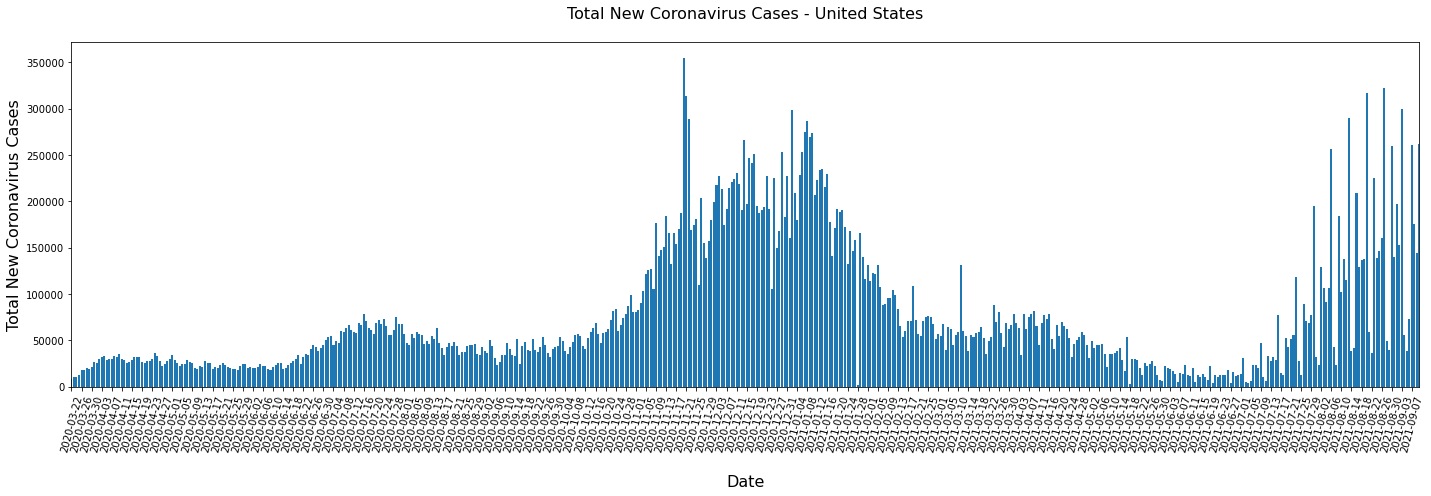

In [13]:
# Create a dataframe to show the trend of total US coronavirus cases by date
tot_us_cases_trend_df = covid_state_df.reset_index().set_index('Date')
tot_cases_gb = tot_us_cases_trend_df.groupby('Date')
tot_us_cases_trend_df = tot_cases_gb[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']].sum()
#Export dataframe to .csv file
tot_us_cases_trend_df.to_csv('Resources/tot_us_cases_trend_df.csv')

# Plot the new cases US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Cases'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-06-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Cases - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Cases', fontsize=16)
plt.tight_layout()

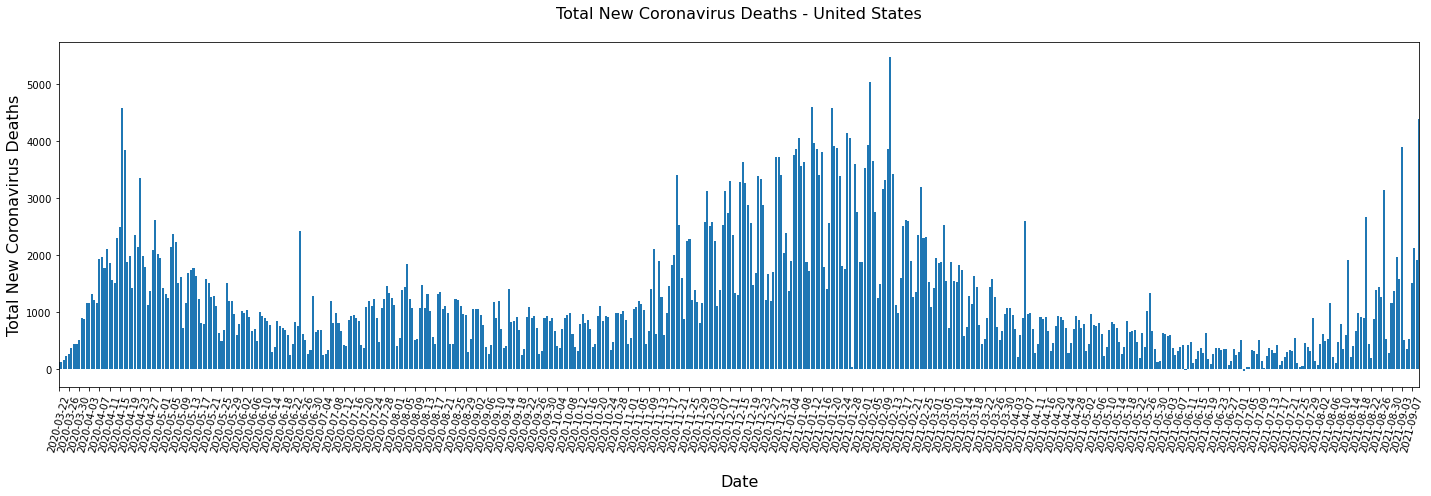

In [14]:
# Plot the new deaths US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Deaths'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-06-22',max_date])

# Set the x axis labels to show every 4th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Deaths - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Deaths', fontsize=16)
plt.tight_layout()

### Total New Cases and New Deaths in The United States

In [15]:
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
last_state_date_df = state_group.last()

# Show the total cases in the US
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')

Coronavirus stats for The United States as of: 2021-09-10

Total US Cases: 40,668,777
Total New US Cases: 261,368
Total US Deaths: 655,781
Total New US Deaths: 4,391


### Seven Day Average of New Cases and New Deaths in The United States

In [16]:
us_avg = covid_state_df.reset_index()[['Date', 'New Cases', 'New Deaths']]
us_avg = us_avg.sort_values('Date', ascending=False)
us_avg_gb = us_avg.groupby('Date')
us_avg = us_avg_gb[['Date', 'New Cases', 'New Deaths']].sum()
us_avg = us_avg.sort_index(ascending=False)
us_avg = us_avg.reset_index().head(7)
date = us_avg['Date'].max()

us_avg_new_cases = round(us_avg['New Cases'].mean(),0)
us_avg_new_deaths = round(us_avg['New Deaths'].mean(),0)
print(f'7 Day average as of {date}:\n')
print(f'The seven day average for New Cases in the United States: {us_avg_new_cases:,}')
print(f'The seven day average for New Deaths in the United States: {us_avg_new_deaths:,}')

7 Day average as of 2021-09-10:

The seven day average for New Cases in the United States: 144,168.0
The seven day average for New Deaths in the United States: 1,617.0


### Top 10 States With the Most New Coronavirus Cases

In [17]:
# Show the top 5 states having the most coronavirus cases
last_state_date_df.sort_values(by=['Date', 'New Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(10)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
Florida,3452700,100249,48772,2448,0.0141,27.7663,-81.6868,2021-09-10
Texas,3812711,19507,59742,404,0.0157,31.0545,-97.5635,2021-09-10
California,4462830,11483,66975,187,0.0150,36.1162,-119.6816,2021-09-10
Ohio,1285757,9019,21154,134,0.0165,40.3888,-82.7649,2021-09-10
Georgia,1484274,8278,23741,156,0.0160,33.0406,-83.6431,2021-09-10
Michigan,1088201,7022,21821,63,0.0201,43.3266,-84.5361,2021-09-10
North Carolina,1279500,5877,15075,71,0.0118,35.6301,-79.8064,2021-09-10
New York,2325332,5652,54602,33,0.0235,42.1657,-74.9481,2021-09-10
Indiana,899844,5328,14783,24,0.0164,39.8494,-86.2583,2021-09-10


### Total Cases by County Heatmap

In [18]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [19]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [20]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus cases in California

In [21]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

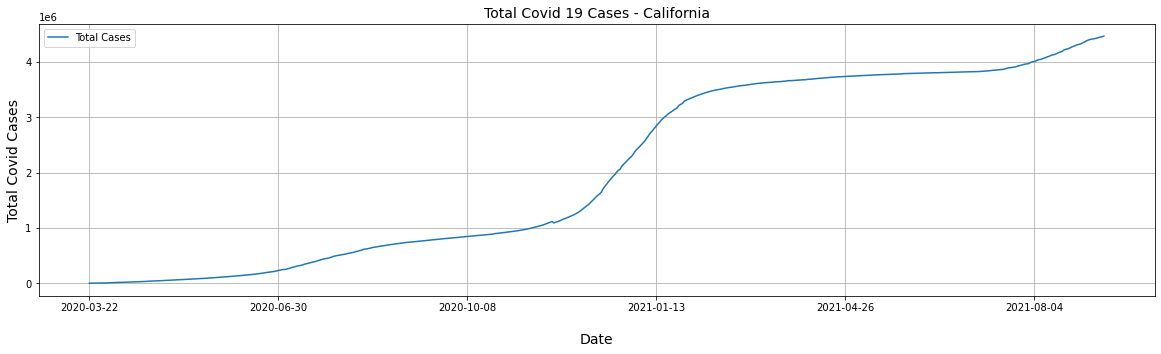

In [22]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [23]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2021-09-10: 4,462,830


### Plot New Coronavirus cases in California

In [24]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

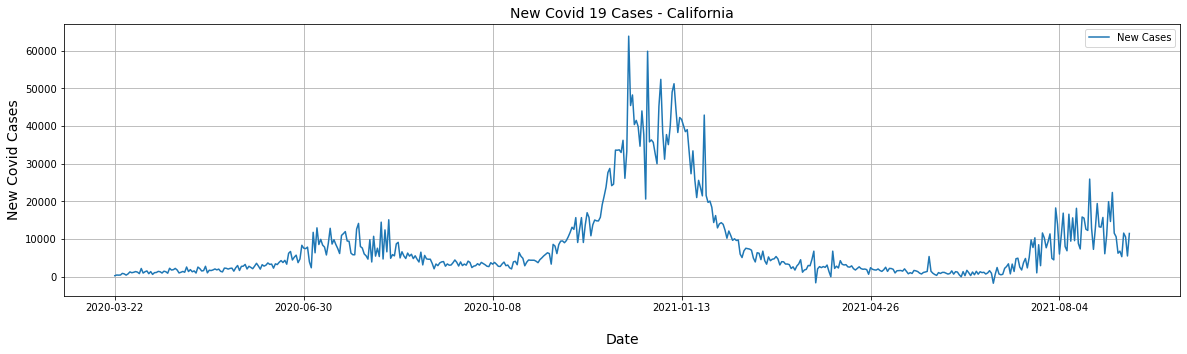

In [25]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [26]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2021-09-10: 11,483


### Plot Total Coronavirus Deaths in California

In [27]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

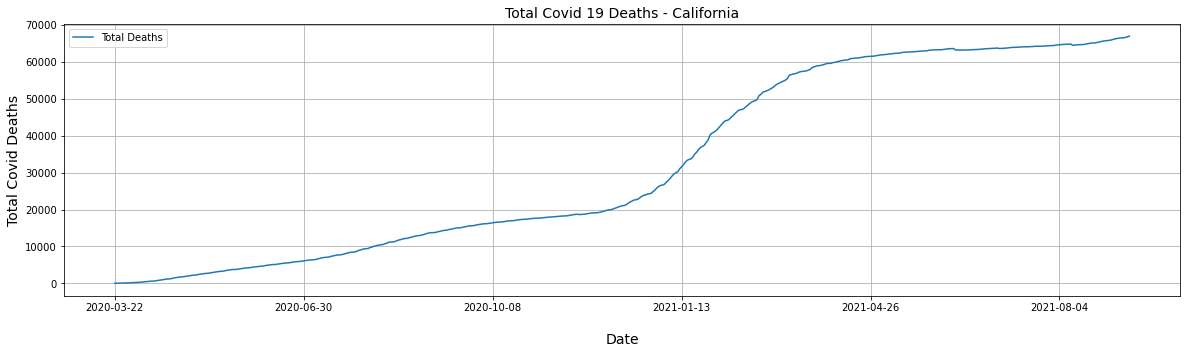

In [28]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [29]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2021-09-10: 66,975


### Plot New Coronavirus Deaths in California

In [30]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

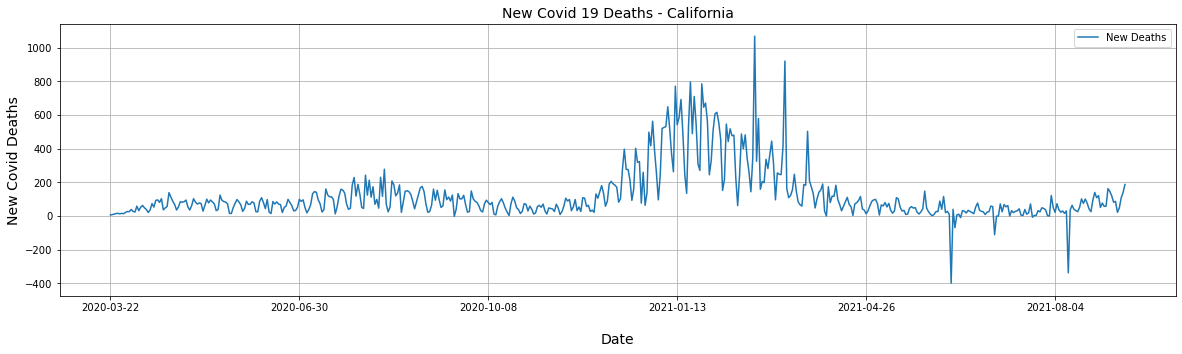

In [31]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [32]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2021-09-10: 187


### Seven Day Average of New Cases and New Deaths in California

In [33]:
my_idx = covid_state_df.index.name
avg_sev_ca_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_ca_df = avg_sev_ca_df.loc['California'].head(7)
ca_date = avg_seven_ca_df['Date'].max()

avg_seven_ca_df = avg_seven_ca_df[['New Cases', 'New Deaths']].mean()
avg_seven_ca_df = pd.DataFrame(avg_seven_ca_df)

new_cases_avg = round(avg_seven_ca_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_ca_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {ca_date}\n')
print(f'The 7 day daily average of New Cases in CA is {new_cases_avg:,}')
print(f'The 7 day daily average of New Deaths in CA is {new_deaths_avg:,}')

7 day avg as of: 2021-09-10

The 7 day daily average of New Cases in CA is 8,215.0
The 7 day daily average of New Deaths in CA is 96.0


### Total Coronavirus Cases - Los Angeles County, CA

In [34]:
# Create a dataframe based on county information
# covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
# county_group = covid_county_df.groupby(['State', 'County'])
# covid_county_last_df = county_group.first()
# covid_county_last_df.sort_values(by=['State', 'New Cases'], ascending=[False, False], inplace=True)

# # Show the total coronavirus cases by county in California
# california_cases_by_county_df = covid_county_last_df.loc['California']
# california_cases_by_county_df

### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

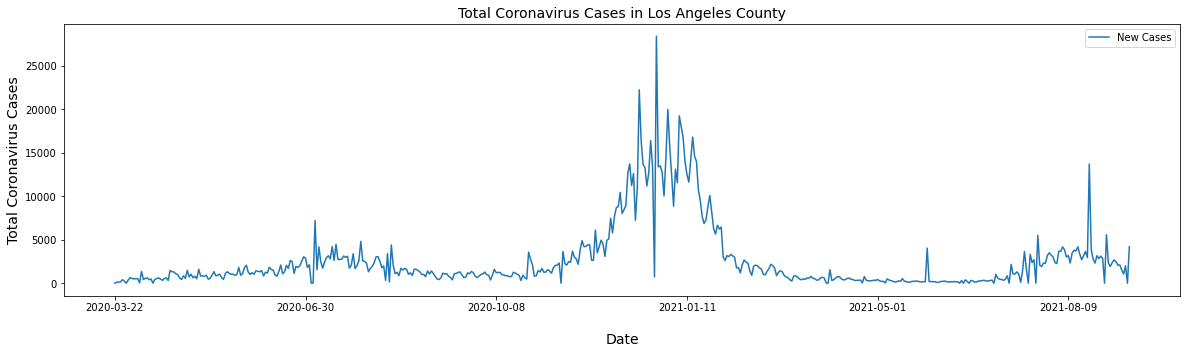

In [35]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [36]:
# new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
# new_cases = new_cases_df.loc['California']['New Cases']
# date = new_cases_df.loc['California']['Date']
# tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
# print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

### Seven Day Average of New Cases and New Deaths in Los Angeles County, CA

In [37]:
la_avg_df = covid_county_df.loc['California']
map_county = la_avg_df['County'] == 'Los Angeles'
la_avg_df = la_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
lac_date = la_avg_df['Date'].max()

la_avg_df = la_avg_df[['New Cases', 'New Deaths']].mean()
la_avg_df = pd.DataFrame(la_avg_df)

la_new_cases_avg = round(la_avg_df.loc['New Cases'][0],0)
la_new_deaths_avg = round(la_avg_df.loc['New Deaths'][0],0)

print(f'7 Day Average as of: {lac_date}\n')
print(f'The 7 day daily average of New Cases in Los Angeles County, CA: {la_new_cases_avg:,}')
print(f'The 7 day daily average of New Deaths in Los Angeles County, CA: {la_new_deaths_avg:,}')

7 Day Average as of: 2021-09-10

The 7 day daily average of New Cases in Los Angeles County, CA: 1,852.0
The 7 day daily average of New Deaths in Los Angeles County, CA: 30.0


### Total Coronavirus cases in Indiana

In [38]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

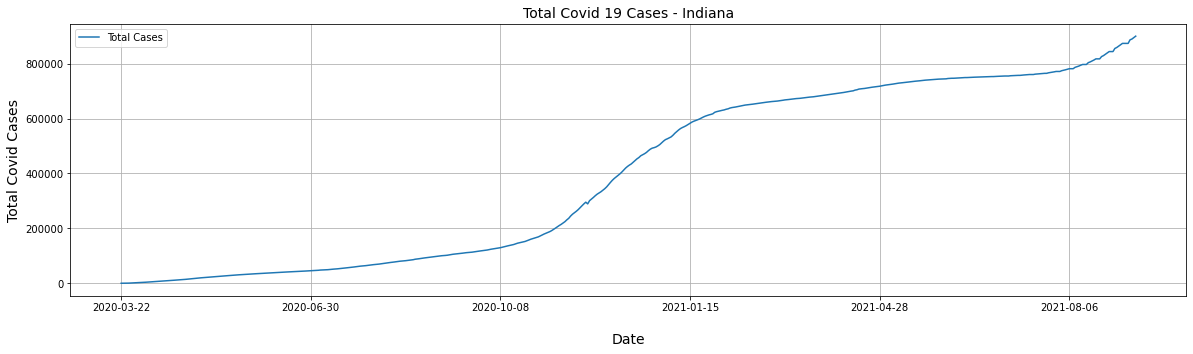

In [39]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [40]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2021-09-10: 899,844


### Plot New Coronavirus cases in Indiana

In [41]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

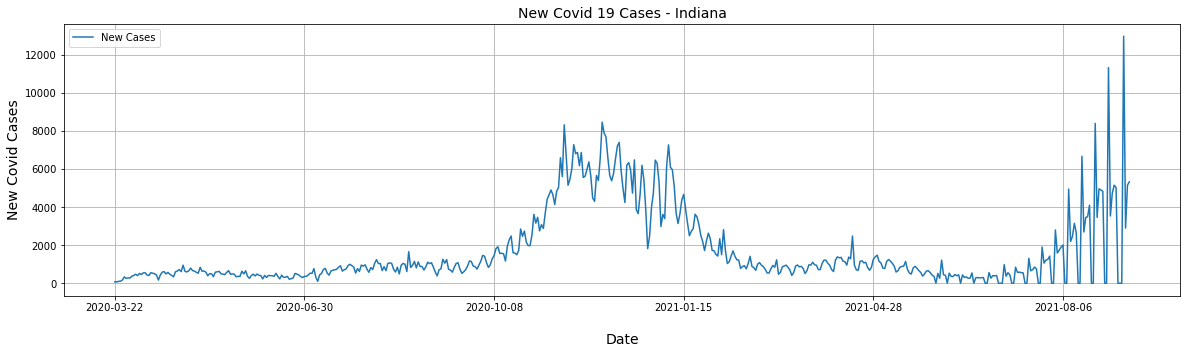

In [42]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [43]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2021-09-10: 5,328


### Plot Total Coronavirus Deaths in Indiana

In [44]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

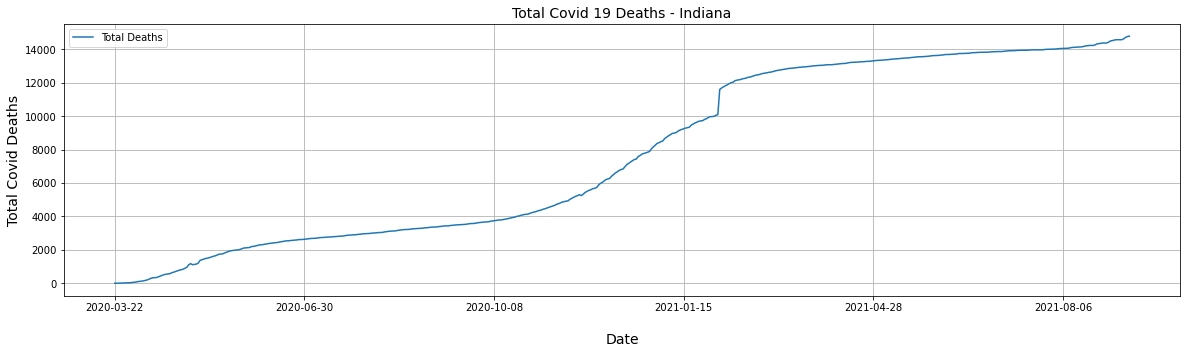

In [45]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [46]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2021-09-10: 14,783


### Plot New Coronavirus Deaths in Indiana

In [47]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

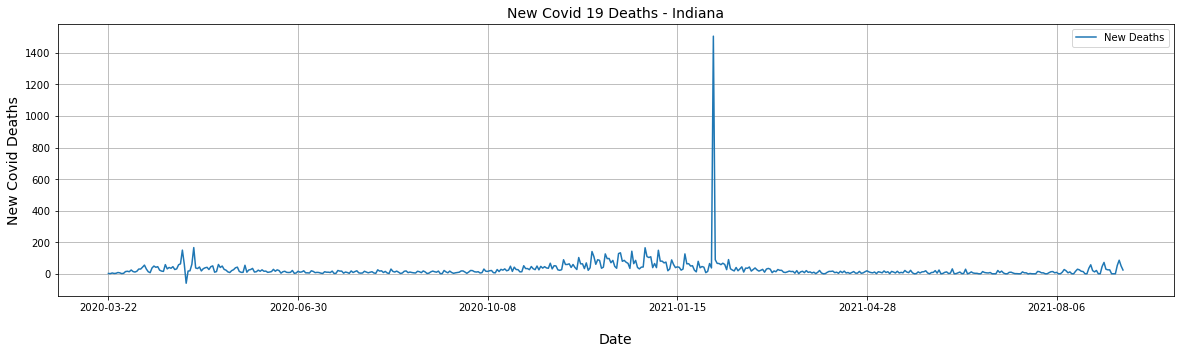

In [48]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [49]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2021-09-10: 24


### Seven Day Average of New Cases and New Deaths in Indiana

In [50]:
my_idx = covid_state_df.index.name
avg_sev_in_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_in_df = avg_sev_in_df.loc['Indiana'].head(7)
in_date = avg_seven_in_df['Date'].max()

avg_seven_in_df = avg_seven_in_df[['New Cases', 'New Deaths']].mean()
avg_seven_in_df = pd.DataFrame(avg_seven_in_df)
# avg_seven_ca_df

new_cases_avg = round(avg_seven_in_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_in_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {in_date}\n')
print(f'The 7 day daily average of New Cases in IN is {new_cases_avg:,}')
print(f'The 7 day daily average of New Deaths in IN is {new_deaths_avg:,}')

7 day avg as of: 2021-09-10

The 7 day daily average of New Cases in IN is 3,766.0
The 7 day daily average of New Deaths in IN is 30.0


### Coronavirus in Fulton County, IN

In [51]:
# Show the total coronavirus cases by county in Indiana
# indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
# indiana_cases_by_county_df

### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total New Coronavirus Cases')

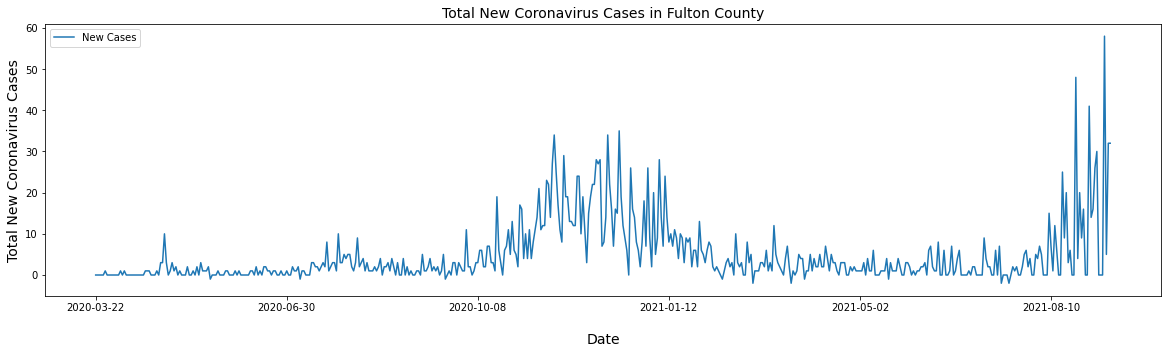

In [52]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

In [53]:
# new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
# new_cases = new_cases_df.loc['Indiana']['New Cases']
# date = new_cases_df.loc['Indiana']['Date']
# tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
# print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, IN.')

### Seven Day Average of New Cases and New Deaths in Fulton County, IN

In [54]:
fc_avg_df = covid_county_df.loc['Indiana']
map_county = fc_avg_df['County'] == 'Fulton'
fc_avg_df = fc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
fc_date = fc_avg_df['Date'].max()

fc_avg_df = fc_avg_df[['New Cases', 'New Deaths']].mean()
fc_avg_df = pd.DataFrame(fc_avg_df)

fc_new_cases_avg = round(fc_avg_df.loc['New Cases'][0],0)
fc_new_deaths_avg = round(fc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {fc_date}\n')
print(f'The 7 day daily average of New Cases in Fulton County, IN is {fc_new_cases_avg:,}')
print(f'The 7 day daily average of New Deaths in Fulton County, IN is {fc_new_deaths_avg:,}')

7 day average as of: 2021-09-10

The 7 day daily average of New Cases in Fulton County, IN is 18.0
The 7 day daily average of New Deaths in Fulton County, IN is 0.29


### New Covid Case Data for Santa Clarita Valley, CA

In [55]:
scv_data_path=('Resources/Covid_19_Santa_Clarita_Valley.xlsx')
scv_covid_df = pd.read_excel(scv_data_path)
scv_covid_df.set_index('Date', inplace = True)

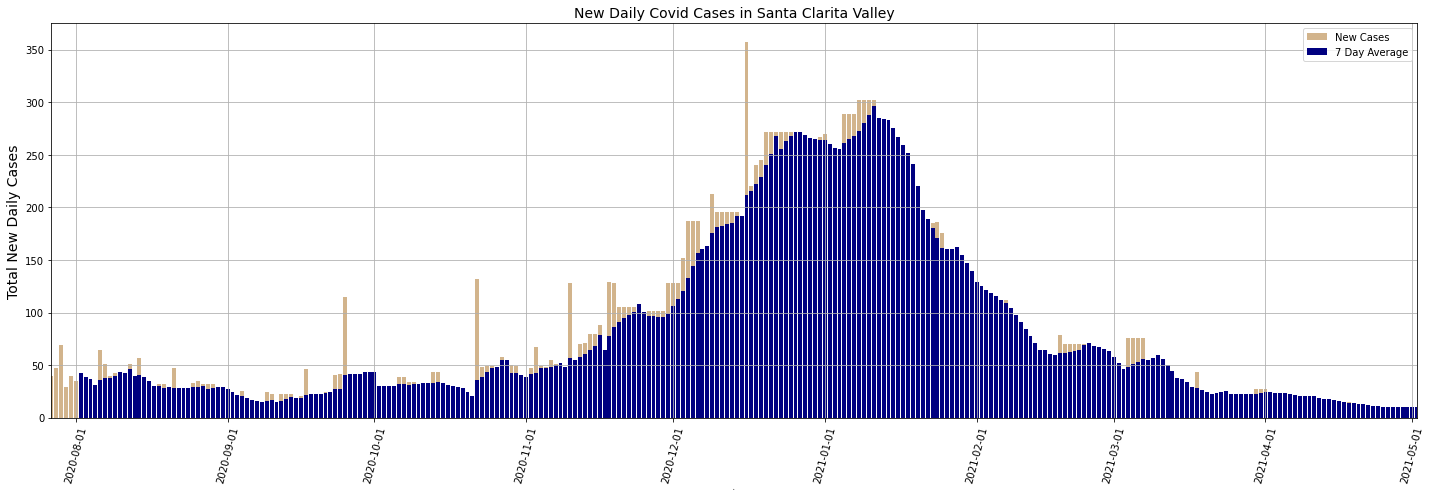

In [56]:
# import the Santa Clarita data into a line chart

# Plot the new cases SCV as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(scv_covid_df.index.values, scv_covid_df['New Cases'], color='tan')
ax.bar(scv_covid_df.index.values, scv_covid_df['7 Day Average'], color='navy')
min_date = scv_covid_df.index.min()
max_date = scv_covid_df.index.max()
ax.set_xlim([min_date,max_date])
ax.legend(['New Cases', '7 Day Average'], loc='best')
ax.grid(True)

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::1])
plt.xticks(rotation=75)

# ax.set_xticklabels('date_list')

plt.title('New Daily Covid Cases in Santa Clarita Valley', fontsize=14)
plt.xlabel('Date', fontsize=1)
plt.ylabel('Total New Daily Cases', fontsize=14)
plt.tight_layout()

In [57]:
scv_covid_df = scv_covid_df.sort_index(ascending=False)
scv_covid_avg_df = scv_covid_df.head(7)
date_val = scv_covid_df.index.max().date()
date_val = (f'{date_val.year}-{date_val.month}-{date_val.day}')

tot_cases = scv_covid_avg_df.loc[date_val]['Total Cases'][0]
new_cases = scv_covid_avg_df.loc[date_val]['New Cases'][0]
avg_cases = round(scv_covid_avg_df['New Cases'].mean(),0)

print(f'Covid data in Santa Clarita Valley as of: {date_val}:\n')
print(f'Total covid cases in Santa Clarita Valley: {tot_cases}')
print(f'New covid cases in Santa Clarita Valley: {new_cases}')
print(f'Seven day average of daily new covid cases in Santa Clarita Valley: {avg_cases}')

Covid data in Santa Clarita Valley as of: 2021-5-2:

Total covid cases in Santa Clarita Valley: 26843.0
New covid cases in Santa Clarita Valley: 10.0
Seven day average of daily new covid cases in Santa Clarita Valley: 10.0
